# H₂ Molecule Homework Assignment
### Quantum Software Development Journey: From Theory to Application with Classiq - Part 3

- Similarly to what we have done in class, in this exercise we will implement the VQE on H2 molecule.
- This time instead of using the built-in methods and functions (such as `Molecule` and `MoleculeProblem`) to difne and solve the problem, you will be provided with a two qubits Hamiltonian.

## Submission
- Submit the completed Jupyter notebook and report via GitHub. Ensure all files are correctly named and organized.
- Use the Typeform link provided in the submission folder to confirm your submission.

## Additional Resources
- [Classiq Documentation](https://docs.classiq.io/latest/)
- The notebook from live session #3

## Important Dates
- **Assignment Release:** 22.5.2024
- **Submission Deadline:** 3.6.2024 (7 A.M GMT+3)

---

Happy coding and good luck!

### Part 1

Given the following Hamiltonian:

$$
\hat{H} = -1.0523 \cdot (I \otimes I) + 0.3979 \cdot (I \otimes Z) - 0.3979 \cdot (Z \otimes I) - 0.0112 \cdot (Z \otimes Z) + 0.1809 \cdot (X \otimes X)
$$

Complete the following code

In [1]:
from typing import List
from classiq import *

# Define Hamiltonian
HAMILTONIAN = QConstant("HAMILTONIAN", List[PauliTerm], [PauliTerm(pauli=[Pauli.I, Pauli.I], coefficient=-1.0523),
                                                         PauliTerm(pauli=[Pauli.I, Pauli.Z], coefficient=0.3979),
                                                         PauliTerm(pauli=[Pauli.Z, Pauli.I], coefficient=-0.3979),
                                                         PauliTerm(pauli=[Pauli.Z, Pauli.Z], coefficient=-0.0112),
                                                         PauliTerm(pauli=[Pauli.X, Pauli.X], coefficient=0.1809)])

In [2]:
@qfunc
def main(q: Output[QArray[QBit]], angles: CArray[CReal, 3]) -> None:
    # Create an ansatz which allows each qubit to have arbitrary rotation
    allocate(2, q)
    U(angles[0], angles[1], angles[2], 0, q[0])
    U(angles[0], angles[1], angles[2], 0, q[1])


@cfunc
def cmain() -> None:
    res = vqe(
        HAMILTONIAN,
        False,
        [],
        optimizer=Optimizer.COBYLA,
        max_iteration=1000,
        tolerance=0.001,
        step_size=0,
        skip_compute_variance=False,
        alpha_cvar=1.0,
    )
    save({"result": res})

qmod = create_model(main, classical_execution_function=cmain) # complete the line, use classical_execution_function
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/67cce443-862c-4003-a483-92d42441cfad?version=0.42.0


In [3]:
execution = execute(qprog)
res = execution.result()
# execution.open_in_ide()
vqe_result = res[0].value

In [4]:
print(f"Optimal energy: {vqe_result.energy}")
print(f"Optimal parameters: {vqe_result.optimal_parameters}")
print(f"Eigenstate: {vqe_result.eigenstate}")

Optimal energy: -1.0604361328125
Optimal parameters: {'angles_0': -0.1958825785281677, 'angles_1': -1.8571141405907794, 'angles_2': 2.9043437874754607}
Eigenstate: {'01': (0.09631896879639025+0j), '10': (0.09375+0j), '00': (0.9909256247317454+0j)}


Does it similar to the `optimal energy` we calculated in class? \
Does it similar to the `total energy` we calculated in class?

<div class="alert alert-block alert-info">
<strong>My answers</strong>: <br/><br/><br/>

**Does it similar to the `optimal energy` we calculated in class?**:

No, the `optimal energy` is not similar to the one calculated in class (with the help of the `Molecule` and `MoleculeProblem` classes), since we are solving the Hamiltonian with two qubits separately, that is, the information between the qubits is not correlated in any way; therefore, there is no parameter setting that considers both qubits as a single system.

<br/>

**Does it similar to the `total energy` we calculated in class?**:

No, it is not similar to the `total energy` either because the `optimal energy` is not similar, so when calculating the `total energy` we cannot obtain a value similar to the one calculated in the class.\
(In the answers to _Part 2_, I calculate the `total energy`)

<br/>

<table>
    <tr>
        <td> </td>
        <td><b>Optimal energy [Ha]</b></td>
        <td><b>Total energy [Ha]</b></td>
    </tr>
    <tr>
        <td><b>From class (session 3)</b></td>
        <td>-1.857821819076969</td>
        <td>-1.137852824627989</td>
    </tr>
    <tr>
        <td><b>From this HW3 (Part 1)</b></td>
        <td>-1.064230957031249</td>
        <td>((na))</td>
    </tr>
</table>

<br/>

**Plot**:

In the next cell, I show the plot of the energy optimization process of the VQE algorithm used. We can see that there is a convergence, but it reaches a plateau relatively quickly, where it remains "stuck" and is still unable to find a better value.

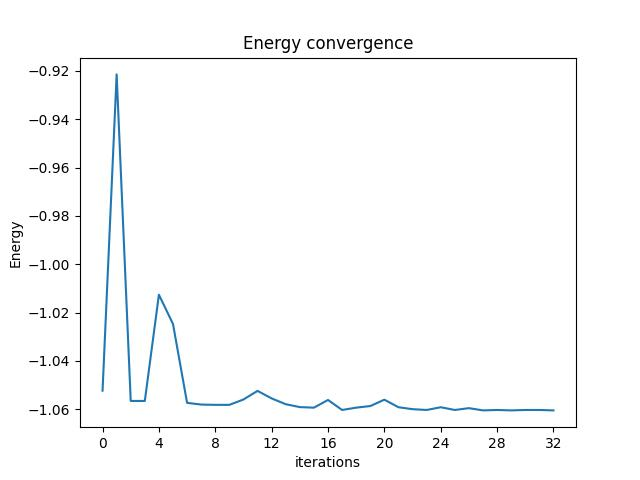

In [5]:
from PIL import Image
import io
import base64

image_bytes = base64.b64decode(vqe_result.convergence_graph_str)

# Usa io.BytesIO para convertir los bytes en un objeto de archivo
image_file = io.BytesIO(image_bytes)

# Abre la imagen con PIL
image = Image.open(image_file)

# Muestra la imagen en el notebook
display(image)

### Part 2

**Now, we want to have a more interesting ansatz in our `main`.**  
Add **one** line of code to the `main` function you created in Part 1 that creates **entanglement** between the two qubits.  
Which gate should you use?

In [6]:
@qfunc
def main(q: Output[QArray[QBit]], angles: CArray[CReal, 3]) -> None:
    # Create an ansatz which allows each qubit to have arbitrary rotation
    allocate(2, q)
    U(angles[0], angles[1], angles[2], 0, q[0])
    U(angles[0], angles[1], angles[2], 0, q[1])
    CX(q[0], q[1])


@cfunc
def cmain() -> None:
    res = vqe(
        HAMILTONIAN,
        False,
        [],
        optimizer=Optimizer.COBYLA,
        max_iteration=1000,
        tolerance=0.001,
        step_size=0,
        skip_compute_variance=False,
        alpha_cvar=1.0,
    )
    save({"result": res})

qmod = create_model(main, classical_execution_function=cmain) # complete the line, use classical_execution_function
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/e57a3c95-4185-4ac7-8eda-0b41e8de8779?version=0.42.0


In [7]:
execution = execute(qprog)
res = execution.result()
# execution.open_in_ide()
vqe_result = res[0].value

In [8]:
print(f"Optimal energy: {vqe_result.energy}")
print(f"Optimal parameters: {vqe_result.optimal_parameters}")
print(f"Eigenstate: {vqe_result.eigenstate}")

Optimal energy: -1.8541486328124999
Optimal parameters: {'angles_0': 3.2528566097261744, 'angles_1': 6.931253517134524, 'angles_2': -3.1732937057222257}
Eigenstate: {'10': (0.07328774624724109+0j), '11': (0.0625+0j), '01': (0.9953505192895616+0j)}


Does it similar to the `optimal energy` we calculated in class? \
Does it similar to the `total energy` we calculated in class? \
What can we learn about the provided  form this result Hamiltonian?

<div class="alert alert-block alert-info">
<strong>My answers</strong>: <br/><br/><br/>

**Does it similar to the `optimal energy` we calculated in class?**:

Yes, the `optimal energy` is similar to the one calculated in class (with the help of the `Molecule` and `MoleculeProblem` classes), this is because the calculation in this Part 2 considers the two correlated qubits (we added a CNOT gate between them) so that now the complete system can be considered formed by two qubits, and when calculating the values of the parameters (the angles) these are subject to working for both qubits at the same time.

<br/>

**Does it similar to the `total energy` we calculated in class?**:

Everything seems to indicate that this will be the case, but to confirm it we need to determine the value of the `nuclear repulsion energy`.

The nuclear repulsion energy in a molecule refers to the energy associated with the repulsion between the nuclei of the atoms that compose it. In a molecule, the nuclei of atoms are positively charged and, therefore, repel each other due to the electrostatic force. To calculate this energy, we need to know the internuclear distance $R$.

We could determine the distance between the two protons of the $H_2$ molecule from the Hamiltonian provided. To do this, we need to remember that the Hamiltonian coefficients are related to integrals of two electrons and other terms that depend on the internuclear distance $R$. But this is not simple to calculate. In fact, this is an inverse problem that is not solved directly from the Hamiltonian in its given form.

Instead, we will consider that the hydrogen molecule is in its ground state, so we can take the average distance between the two nuclei, which would be equal to approximately $74 \ \text{pm} $ or $ 0.74 \ \text{Å} $ or $0.74 \times 10^{-10} \ \text{m}$.

To calculate the nuclear repulsion energy for the $H_2$ molecule, the formula for the electrostatic potential energy between two charges $q_1$ and $q_2$ can be used:

$$ E_{\text{repulsion}} = \frac{k \cdot q_1 \cdot q_2}{R} $$

where:
- $ E_{\text{repulsion}} $ is the the nuclear repulsion energy
- $ k $ is the Coulomb constant ($8.987 \times 10^9 \ \text{N·m}^2/\text{C}^2 $)
- $ q_1 $ and $ q_2 $ are the charges of the nuclei (in the case of $H_2$, both are $ +1e $, where $ e $ is the charge of the proton, $ 1.602 \times 10^{-19} \ \text{C} $)
- $ R $ is the distance between the nuclei

Therefore,

\begin{align}
E_{\text{repulsion}} &= \frac{(1.602 \times 10^{-19} \ \text{C})^2}{4 \pi (8.854 \times 10^{-12} \ \text{F/m}) \times 0.74 \times 10^{-10} \ \text{m}}\\\\
&= \frac{2.566 \times 10^{-38}}{1.112 \times 10^{-10} \times 0.74 \times 10^{-10}}\\\\
&= \frac{2.566 \times 10^{-38}}{8.237 \times 10^{-21}}\\\\
&= 3.115 \times 10^{-18} \ \text{J}
\end{align}

We convert to Hartree:

$$ E_{\text{repulsion},(\text{Hartree})}  = \frac{3.115 \times 10^{-18} \ \text{J}}{4.3597447222071 \times 10^{-18} \ \text{J/Hartree}} = 0.714 \ \text{Hartree} $$

<br/>

Then, the `total energy` of the molecule is obtained by adding this nuclear repulsion energy to the electronic energy calculated from the given Hamiltonian:

$$E_{\text{total}}= -1.8541486328124999 + 0.714 = -1.1401486328124999 \ \text{Hartree}$$

<br/>
<br/>

Therefore, we can conclude that the total energy is similar to that obtained in class with the help of the `Molecule` and `MoleculeProblem` classes, since a VQE algorithm for a two-qubit system works to determine the total energy of the hydrogen molecule $H_2$, as long as the qubits are correlated with each other.

<br/>
<br/>

<table>
    <tr>
        <td> </td>
        <td><b>Optimal energy [Ha]</b></td>
        <td><b>Total energy [Ha]</b></td>
    </tr>
    <tr>
        <td><b>From class (session 3)</b></td>
        <td>-1.857821819076969</td>
        <td>-1.137852824627989</td>
    </tr>
    <tr>
        <td><b>From this HW3 (Part 2)</b></td>
        <td>-1.854148632812499</td>
        <td>-1.140148632812499</td>
    </tr>
</table>

<br/>

<br/>

**What can we learn about the provided form this result Hamiltonian?**:

It is essential to consider the complete system as a whole; in this case, the system was composed of two qubits, and these must have a relationship between them to complete the representation of the Hamiltonian in a quantum circuit. We can find the value of the total energy of an appropriate way, the system must be internally correlated, in this case, the two qubits that make it up must have some quantum gate that correlates them.

<br/>

**Plot**:

In the next cell, I show the plot of the energy optimization process of the VQE algorithm used. We can see that there is a convergence, but it reaches a plateau relatively quickly, where it remains "stuck" and is still unable to find a better value.

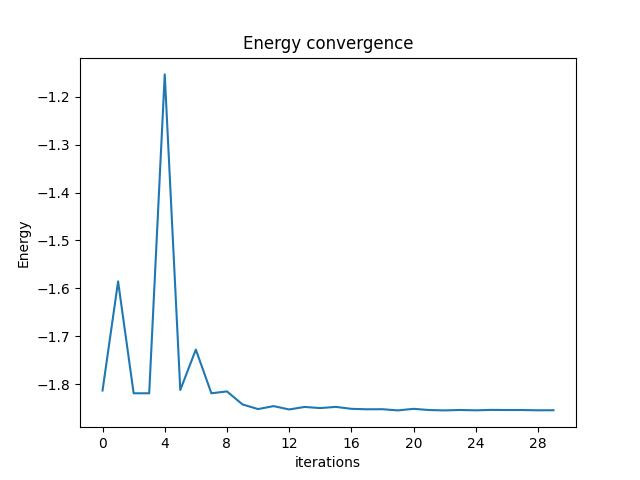

In [9]:
from PIL import Image
import io
import base64

image_bytes = base64.b64decode(vqe_result.convergence_graph_str)

# Usa io.BytesIO para convertir los bytes en un objeto de archivo
image_file = io.BytesIO(image_bytes)

# Abre la imagen con PIL
image = Image.open(image_file)

# Muestra la imagen en el notebook
display(image)